#  2017遥感数字图像处理实验作业1

## 红蓝波段对调

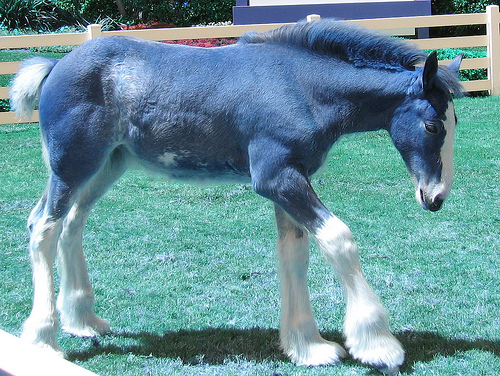

In [1]:
import numpy as np  #using numpy and PIL
from PIL import Image
#source image
sImg=Image.open(".\\horse.jpeg") #打不开的情况请用绝对路径
#sImg.show() #展示图片
bands=sImg.split() #切分波段
rimg=bands[0] # R
gimg=bands[1] # G
bimg=bands[2] # B
newImg=Image.merge('RGB',(bimg,gimg,rimg)) #“假彩色合成”
newImg.save(".\\horse1.jpeg")
newImg   #newImg.show()

## 旋转45度并显示(未指定顺时针还是逆时针）

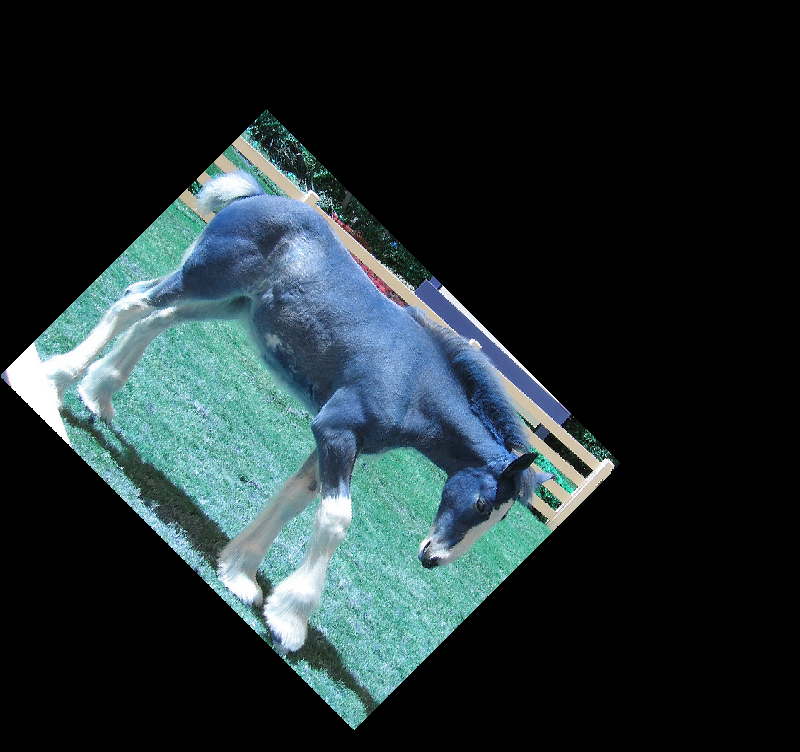

In [3]:
import math   #用于计算正弦、余弦
img_arr=np.array(newImg) #new image's np array
(height,width,bands) = img_arr.shape
rheight=height
rwidth=width
#转置图像数组：
img_t_arr = np.zeros((rheight*2,int(rwidth*1.6),bands),dtype=np.uint8)
cos_a=math.sqrt(2)/2
sin_a=math.sqrt(2)/2
for ih in range(rheight):
    for iw in range(rwidth):
        t_mat=np.matrix([[cos_a,sin_a],[-sin_a,cos_a]])#顺时针45度变换矩阵
        jh=rheight-ih
        res_m=[jh,iw]*t_mat
        res_lst=res_m.tolist()
        kh=int(rheight-res_lst[0][0]+0.5) #将小数转为最近的坐标值用于填充像素
        kw=int(res_lst[0][1]+0.5)
        
        for ib in range(bands): #0  1  2
            img_t_arr[kh][kw][ib] =img_arr[ih][iw][ib]

        if (img_t_arr[kh-1][kw][0]==0): #该格未填充时，下一个elif作用相同
            for ib in range(bands):
                img_t_arr[kh-1][kw][ib] =img_t_arr[kh][kw][ib]
                #此处可以进一步优化，如由其周围8个单元格均衡化计算[kh-1][kw]处的值
                '''avg_t =(np.int32(img_t_arr[kh][kw - 1][ib]) + img_t_arr[kh][kw][ib]
                         + img_t_arr[kh][kw + 1][ib] + img_t_arr[kh+1][kw - 1][ib]
                         + img_t_arr[kh+1][kw + 1][ib] + img_t_arr[kh+2][kw - 1][ib]
                         + img_t_arr[kh+2][kw][ib] + img_t_arr[kh+2][kw + 1][ib]) // 8 #八个格做平均
                img_t_arr[kh+1][kw][ib] = avg_t
                #但尝试后觉得效果不如直接填充
                '''
        elif (img_t_arr[kh+1][kw][0]==0):
            for ib in range(bands):
                img_t_arr[kh+1][kw][ib] =img_t_arr[kh][kw][ib]

im_t_PIL = Image.fromarray(img_t_arr)
im_t_PIL.save(".\\horse_T.jpeg")
im_t_PIL
